# Data

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LSTM Model

## Train, Validation and Test Dataset

## Model Structure


In [580]:
point_x = np.array([1.0, 2.0, 1.0, 1.0])
point_y = np.array([0])
point_val_x = np.array([2.0, 2.0, 3.0, 4.0])
point_val_y = np.array([1])

In [581]:
point_x = point_x.reshape(point_x.shape[0], 1)
point_x = point_x.reshape((point_x.shape[1], point_x.shape[0], 1))

In [582]:
point_val_x = point_val_x.reshape(point_val_x.shape[0], 1)
point_val_x = point_val_x.reshape((point_val_x.shape[1], point_val_x.shape[0], 1))

In [583]:
time_step = 4

In [584]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()


# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 12, return_sequences = True, input_shape = (time_step, 1)))
# model.add(Dropout(0.2))


# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

"""
# # Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
# model.add(Dropout(0.2))
"""

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [585]:
model.summary()

Model: "sequential_354"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_528 (LSTM)             (None, 4, 12)             672       
                                                                 
 lstm_529 (LSTM)             (None, 4, 50)             12600     
                                                                 
 dense_352 (Dense)           (None, 4, 1)              51        
                                                                 
Total params: 13,323
Trainable params: 13,323
Non-trainable params: 0
_________________________________________________________________


In [586]:
initial = model.get_weights()
print(initial)

[array([[ 0.19434622, -0.2828244 , -0.2945052 ,  0.03009781, -0.16921228,
        -0.10762882,  0.07499209, -0.34982598,  0.12338382,  0.19819656,
         0.05985814, -0.07117522, -0.18363509,  0.1924378 , -0.2000677 ,
        -0.13321704, -0.20577635,  0.33740178,  0.05305159, -0.33197683,
        -0.08064911, -0.15722369,  0.14207304,  0.2865058 ,  0.24418792,
         0.08347577,  0.14864618,  0.09387544,  0.11934319,  0.23437992,
         0.21435669,  0.25492385, -0.27559543,  0.31064072,  0.31027773,
        -0.2411241 ,  0.12130821, -0.18793611,  0.27927133,  0.13576764,
        -0.2970705 , -0.12823424, -0.03536385,  0.13961631, -0.02833003,
         0.09279653, -0.20043254,  0.323657  ]], dtype=float32), array([[-1.54232979e-02, -2.97924906e-01, -2.36563772e-01,
        -9.99140069e-02, -7.10031614e-02, -2.25555953e-02,
         8.27419460e-02,  3.82993296e-02, -4.74046767e-02,
        -3.75851661e-01,  2.00131103e-01,  1.22183738e-02,
        -1.19954497e-01,  3.82165760e-02,

In [587]:
model.set_weights(initial)

In [588]:
model.get_weights()

[array([[ 0.19434622, -0.2828244 , -0.2945052 ,  0.03009781, -0.16921228,
         -0.10762882,  0.07499209, -0.34982598,  0.12338382,  0.19819656,
          0.05985814, -0.07117522, -0.18363509,  0.1924378 , -0.2000677 ,
         -0.13321704, -0.20577635,  0.33740178,  0.05305159, -0.33197683,
         -0.08064911, -0.15722369,  0.14207304,  0.2865058 ,  0.24418792,
          0.08347577,  0.14864618,  0.09387544,  0.11934319,  0.23437992,
          0.21435669,  0.25492385, -0.27559543,  0.31064072,  0.31027773,
         -0.2411241 ,  0.12130821, -0.18793611,  0.27927133,  0.13576764,
         -0.2970705 , -0.12823424, -0.03536385,  0.13961631, -0.02833003,
          0.09279653, -0.20043254,  0.323657  ]], dtype=float32),
 array([[-1.54232979e-02, -2.97924906e-01, -2.36563772e-01,
         -9.99140069e-02, -7.10031614e-02, -2.25555953e-02,
          8.27419460e-02,  3.82993296e-02, -4.74046767e-02,
         -3.75851661e-01,  2.00131103e-01,  1.22183738e-02,
         -1.19954497e-01,  3

In [157]:
#X_train = X_train.reshape((X_train.shape[1], X_train.shape[0], 1))

In [161]:
#X_val = X_val.reshape((X_val.shape[1], X_val.shape[0], 1))

## Model Training

In [589]:
history = model.fit(point_x, point_y, validation_data = (point_val_x,point_val_y), verbose = 1,epochs = 1 ,batch_size = 1)

1/1 [==============================] - 7s 7s/step - loss: 8.3753e-05 - val_loss: 0.9604


In [590]:
model.get_weights()

[array([[ 0.19530396, -0.28345698, -0.2935752 ,  0.03105162, -0.17019154,
         -0.10861516,  0.07404035, -0.34890416,  0.12272552,  0.19917136,
          0.05890192, -0.07211512, -0.18271238,  0.19230278, -0.19926234,
         -0.1323259 , -0.20671172,  0.33645257,  0.05221217, -0.33119598,
         -0.08032205, -0.1562781 ,  0.14118913,  0.28577882,  0.24518088,
          0.08251562,  0.14963649,  0.09487153,  0.11834618,  0.233383  ,
          0.21336502,  0.25590527, -0.27470002,  0.3116355 ,  0.30929017,
         -0.2401374 ,  0.12225995, -0.18858802,  0.28015316,  0.13670984,
         -0.29804793, -0.12921867, -0.03631794,  0.14050455, -0.0290973 ,
          0.09377268, -0.20139521,  0.32273328]], dtype=float32),
 array([[-1.48063097e-02, -2.97958285e-01, -2.36146644e-01,
         -9.93074402e-02, -7.18028620e-02, -2.33829301e-02,
          8.22621137e-02,  3.86289284e-02, -4.73163053e-02,
         -3.75182122e-01,  1.99516907e-01,  1.18312109e-02,
         -1.19329169e-01,  3

DESIRED PARAMETERS

In [596]:
desired_parameters = model.get_weights()

In [597]:
import itertools
combinations = itertools.product([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], repeat=4)
interval_list = [0, 10, 20, 30, 40]

In [598]:
print(point_x.shape)

(1, 4, 1)


In [599]:
print(point_y.shape)

(1,)


In [600]:
def guess_the_user_value_white_box(desired_parameters):
    for combination in combinations:

        X1 = []
        y1 = []

        label = len(interval_list)

        for number in combination:
            X1.append(float(number))


        sum_of_combination = sum(combination)
        for i in range(len(interval_list) - 1):
            left = interval_list[i]
            right = interval_list[i + 1]
            if left <= sum_of_combination <= right:
                label = i


        #print(sum_of_combination, label)
        y1.append(int(label))

        point_x = np.array(X1)
        point_y = np.array(y1)
        #point_y = np.array([0.39781086])

        """
        point_x = np.array([4.0, 3.0, 2.0, 1])
        point_y = np.array([0.39781086])
        """

        point_x = point_x.reshape(point_x.shape[0], 1)
        point_x = point_x.reshape((point_x.shape[1], point_x.shape[0], 1))

        point_val_x = np.array([2.0, 2.0, 3.0, 4.0])
        point_val_y = np.array([1])

        point_val_x = point_val_x.reshape(point_val_x.shape[0], 1)
        point_val_x = point_val_x.reshape((point_val_x.shape[1], point_val_x.shape[0], 1))


        model = Sequential()

        # Adding the first LSTM layer and some Dropout regularisation
        model.add(LSTM(units = 12, return_sequences = True, input_shape = (time_step, 1)))
        # model.add(Dropout(0.2))


        # Adding a second LSTM layer and some Dropout regularisation
        model.add(LSTM(units = 50, return_sequences = True))
        # model.add(Dropout(0.2))

        """

        # # Adding a third LSTM layer and some Dropout regularisation
        model.add(LSTM(units = 50, return_sequences = True))
        # model.add(Dropout(0.2))

        # Adding a fourth LSTM layer and some Dropout regularisation
        model.add(LSTM(units = 50))
        # model.add(Dropout(0.2))
        """

        # Adding the output layer
        model.add(Dense(units = 1))

        # Compiling the RNN
        model.compile(optimizer = 'adam', loss = 'mean_squared_error')

        model.set_weights(initial)

        #print(model.get_weights())

        history = model.fit(point_x, point_y, validation_data = (point_val_x,point_val_y), verbose = 1,epochs = 1 ,batch_size = 1)

        model_parameters = model.get_weights()

        #print()
        #print(model.get_weights())
        #print("heeee")

        count = 0
        for i in range(len(model_parameters)):

          if(count == len(model_parameters)-1):
            #print("here " + str(i))
            return point_x, point_y

          elif(np.array_equal(model_parameters[i], desired_parameters[i])):
            #print(i)
            count = count + 1






In [601]:
guess_value = guess_the_user_value_white_box(desired_parameters)
print(guess_value)

1/1 [==============================] - 4s 4s/step - loss: 8.3753e-05 - val_loss: 0.9604
(array([[[1.],
        [2.],
        [1.],
        [1.]]]), array([0]))


In [35]:
# # How to save your model in Google Drive
# import torch
# from google.colab import drive
# drive.mount('/content/gdrive')

In [36]:
# model_save_name = 'LSTM-Model2022.h5'
# path = F"/content/gdrive/My Drive/{model_save_name}"
# torch.save(model, path)

## Model Evaluating

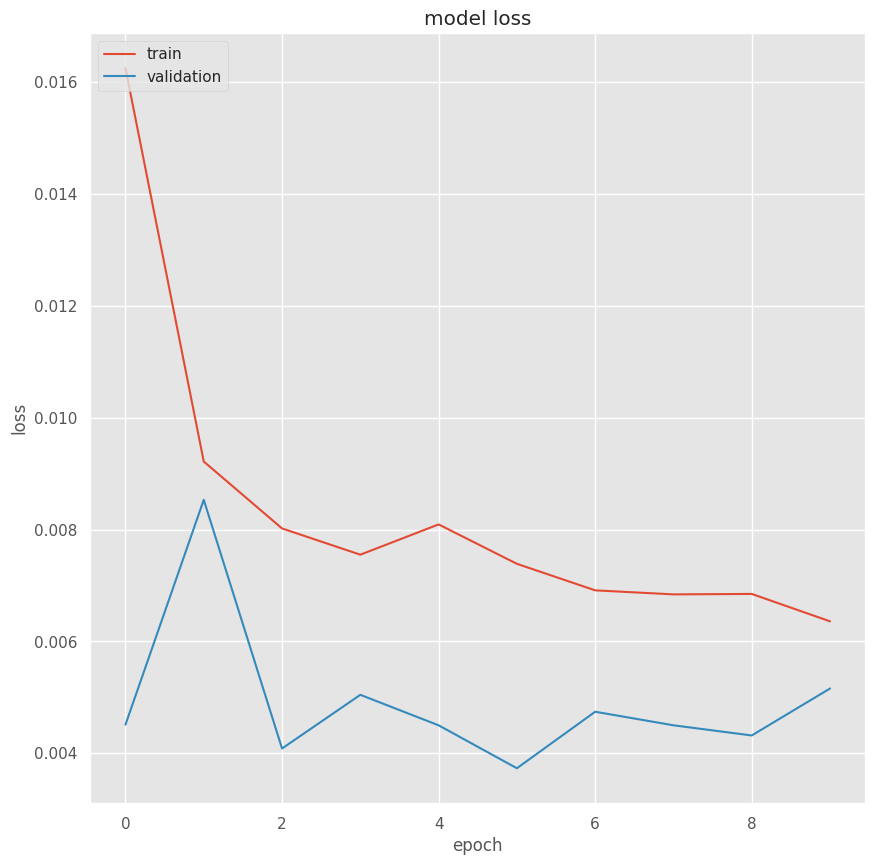

In [37]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss']) # tb
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [38]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [39]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
val_predict=model.predict(X_val)


4/4 [==============================] - 0s 60ms/step


In [40]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
val_predict=scaler.inverse_transform(val_predict)

In [41]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

9463.829062155353

In [42]:
print(train_predict.shape)
print(test_predict.shape)
print(val_predict.shape)
print(train_predict[0])
print(y_train.shape)


(755, 1)
(167, 1)
(113, 1)
[9360.278]
(755,)


# Conclusion

In [43]:
# Predicting consumption using training data
train_predictions = model.predict(X_train)
train_predictions =scaler.inverse_transform(train_predictions)

y_train = y_train.reshape(y_train.shape[0], 1)
actual = scaler.inverse_transform(y_train)
train_results = pd.DataFrame()

train_results["Train Predictions"] = train_predictions.tolist()
train_results["Actuals"] = actual.tolist()

train_results

24/24 [==============================] - 2s 64ms/step


,Train Predictions,Actuals
0,[9360.2783203125],[9406.708333333334]
1,[9321.0673828125],[9614.791666666666]
2,[9285.978515625],[9894.708333333334]
3,[9260.9990234375],[8933.708333333334]
4,[9240.8330078125],[8557.208333333334]
...,...,...
750,[8804.26171875],[9218.333333333334]
751,[8789.0244140625],[9386.375]
752,[8782.392578125],[8738.666666666666]
753,[8780.1572265625],[8166.625]


ValueError: ignored

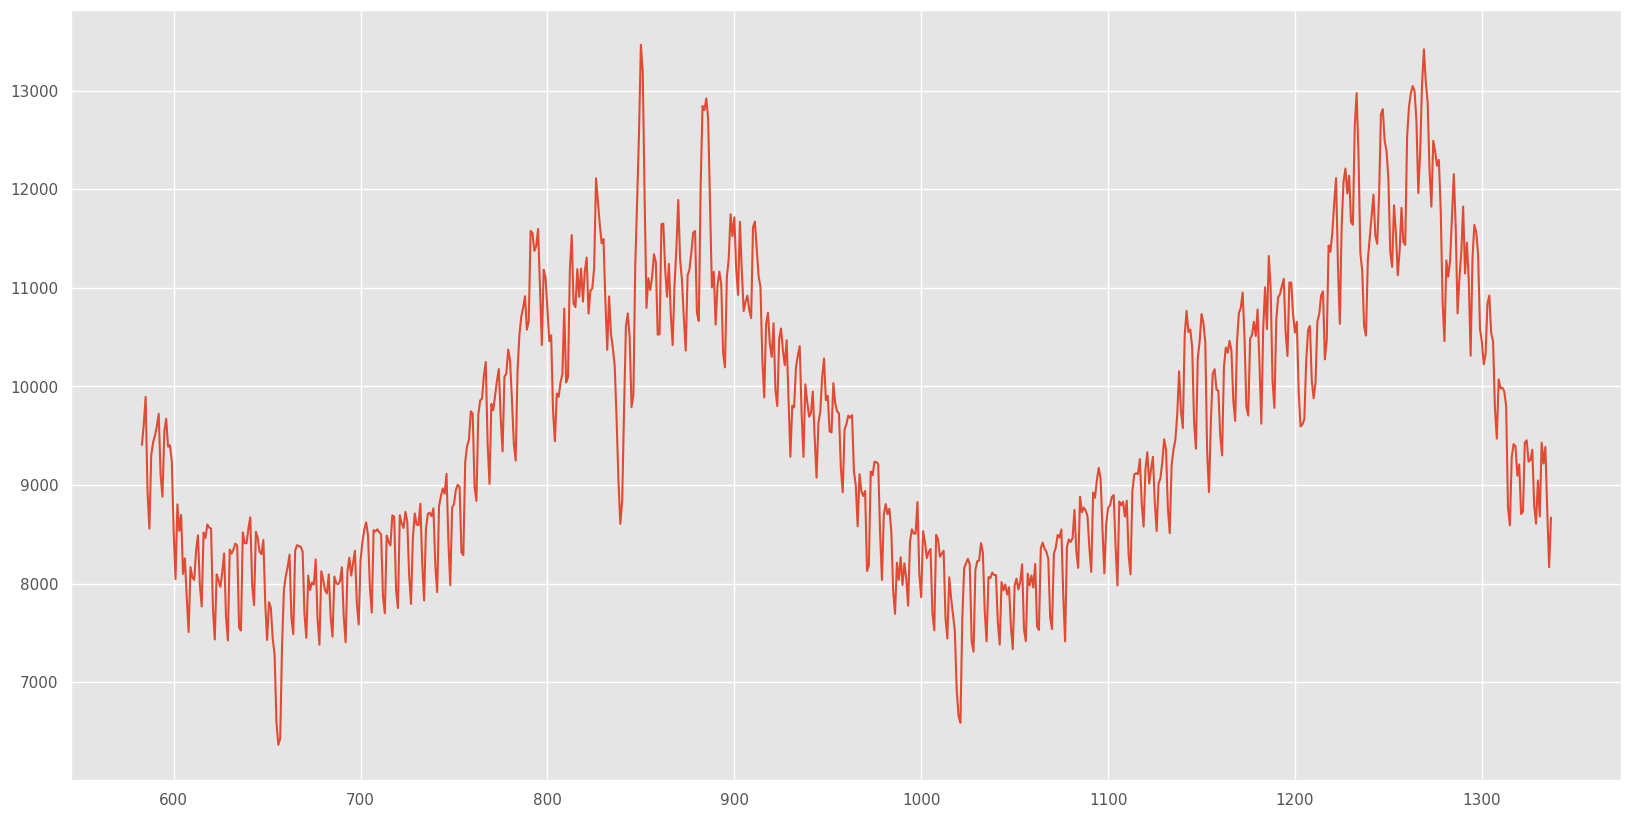

In [47]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y )
ActualPlot[:, :] = np.nan
ActualPlot[583:, :] = actual.tolist()
plt.plot(ActualPlot)

TrainPredictionsPlot = np.empty_like(y )
TrainPredictionsPlot[:, :] = np.nan
TrainPredictionsPlot[451:, :] = train_predictions.tolist()
plt.plot(TrainPredictionsPlot)

plt.legend(['actual','train_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')
plt.show()

In [48]:
# Predicting consumption using validation data
val_predictions = model.predict(X_val)
val_predictions =scaler.inverse_transform(val_predictions)

yval = yval.reshape(yval.shape[0], 1)
actual_val = scaler.inverse_transform(yval)

val_results = pd.DataFrame()
val_results["Val Predictions"] = val_predictions.tolist()
val_results["Actuals_val"] = actual_val.tolist()

val_results


4/4 [==============================] - 0s 55ms/step


,Val Predictions,Actuals_val
0,[8342.4306640625],[8877.458333333334]
1,[8367.0751953125],[8088.25]
2,[8392.24609375],[7900.375]
3,[8410.099609375],[8659.916666666666]
4,[8421.369140625],[8638.458333333334]
...,...,...
108,[10700.353515625],[11343.125]
109,[10738.447265625],[11158.833333333334]
110,[10765.28515625],[11034.416666666666]
111,[10783.158203125],[10718.583333333334]


In [49]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1936:, :] = actual_val.tolist()
plt.plot(ActualPlot)

# Validation Prediction
ValPredictionsPlot = np.empty_like(y)
ValPredictionsPlot[:, :] = np.nan
ValPredictionsPlot[1936:, :] = val_predictions.tolist()
plt.plot(ValPredictionsPlot)

plt.legend(['actual_val','Val_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')


ValueError: ignored

<Figure size 2000x1000 with 0 Axes>

In [50]:
# Predicting consumption using test data
test_predictions = model.predict(X_test)
test_predictions =scaler.inverse_transform(test_predictions)

ytest = ytest.reshape(ytest.shape[0], 1)
actual_test = scaler.inverse_transform(ytest)

test_results = pd.DataFrame()
test_results["test Predictions"] = test_predictions.tolist()
test_results["Actuals_test"] = actual_test.tolist()

test_results

6/6 [==============================] - 0s 56ms/step


,test Predictions,Actuals_test
0,[10784.2236328125],[10476.0]
1,[10728.4052734375],[10660.208333333334]
2,[10664.8857421875],[10587.875]
3,[10598.953125],[10506.125]
4,[10533.908203125],[10190.375]
...,...,...
162,[8188.63720703125],[8300.75]
163,[8193.1005859375],[8375.583333333334]
164,[8197.9931640625],[8534.375]
165,[8205.6591796875],[7860.458333333333]


In [51]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1848:, :] = actual_test.tolist()
plt.plot(ActualPlot)

# Test Prediction
TestPredictionsPlot = np.empty_like(y)
TestPredictionsPlot[:, :] = np.nan
TestPredictionsPlot[1848:, :] = test_predictions.tolist()
plt.plot(TestPredictionsPlot)

plt.legend(['Actual_test','Test_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')

ValueError: ignored

<Figure size 2000x1000 with 0 Axes>

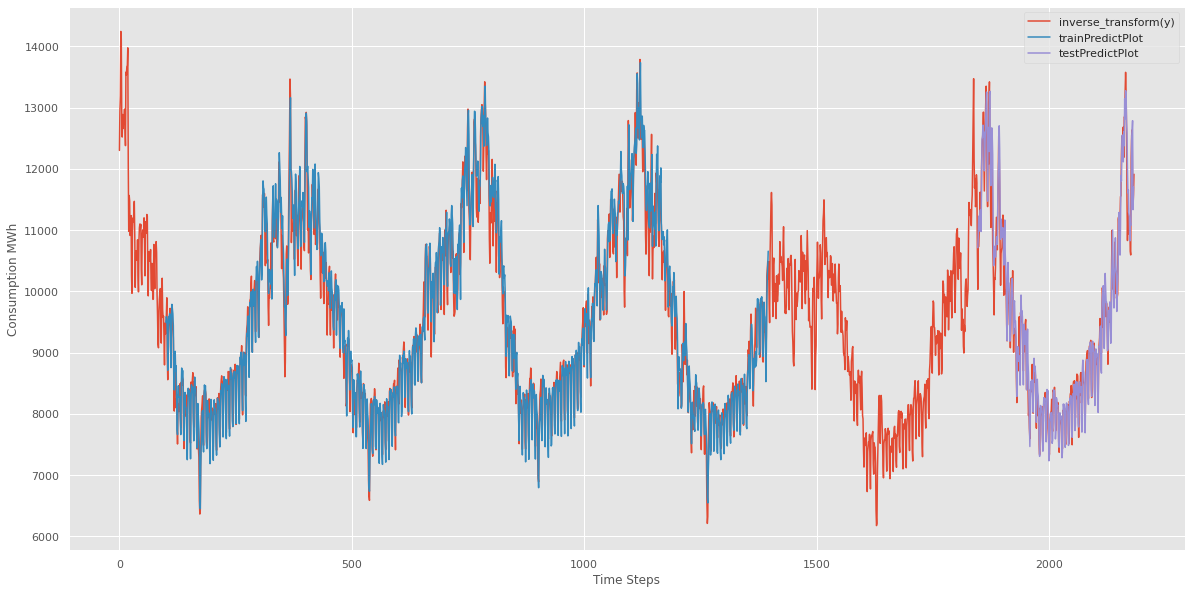

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100 #*****************************************>>>>>100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = np.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(y)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1+349:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['inverse_transform(y)','trainPredictPlot','testPredictPlot'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')
plt.show()

# Future forecasting

In [52]:
print(len(test_data))
print(test_data[0])
print(len(train_data))
x_input=test_data[337:].reshape(1,-1)
print(x_input.shape)
# print(x_input[0])
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
# print(temp_input)

268
[0.49951756]
856
(1, 0)


In [53]:

# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
test = ""
while(i<30):

    if(len(temp_input)>100):
        test = "if"
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        test="else"
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(test)
print(len(lst_output))

ValueError: ignored

2184
[[12331.03070001]
 [12577.691445  ]
 [12755.69012324]
 [12752.9766276 ]
 [12354.36782042]
 [12228.65983332]
 [12788.01644931]
 [13087.43912871]
 [13177.4807329 ]
 [13259.16209693]
 [13148.39011694]
 [12728.81964008]
 [12638.40248386]
 [13072.54591818]
 [13297.5660185 ]
 [13367.72067616]
 [13408.98427496]
 [13268.95385871]
 [12910.72146277]
 [12879.79636411]
 [13242.54884849]
 [13438.23790262]
 [13503.25168098]
 [13516.83454672]
 [13362.52834479]
 [13059.1775162 ]
 [13060.40611471]
 [13359.09115414]
 [13525.4914778 ]
 [13581.14819224]]


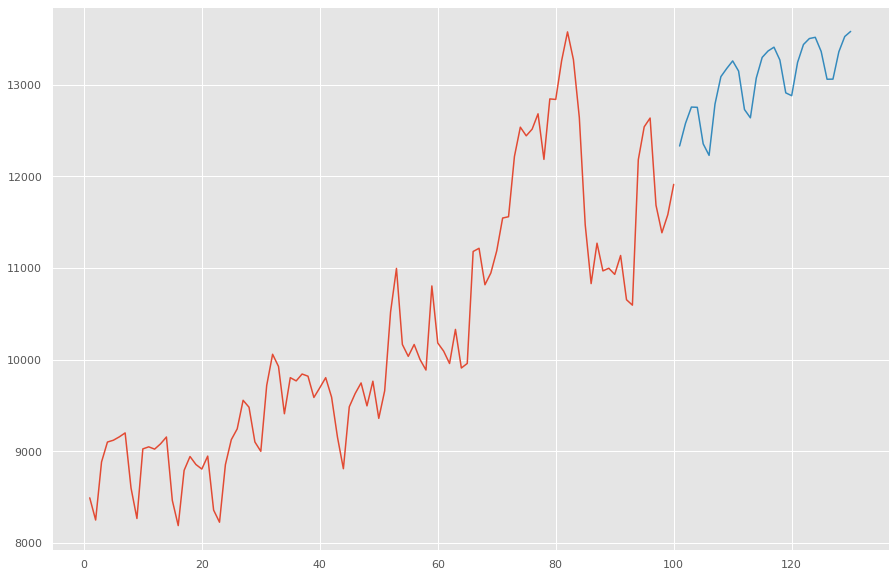

In [ ]:
print(len(y))
day_new=np.arange(1,101)
day_pred=np.arange(101, 131 )
plt.figure(figsize = (15,10))
plt.plot(day_new,scaler.inverse_transform(y[2084:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
print(scaler.inverse_transform(lst_output))

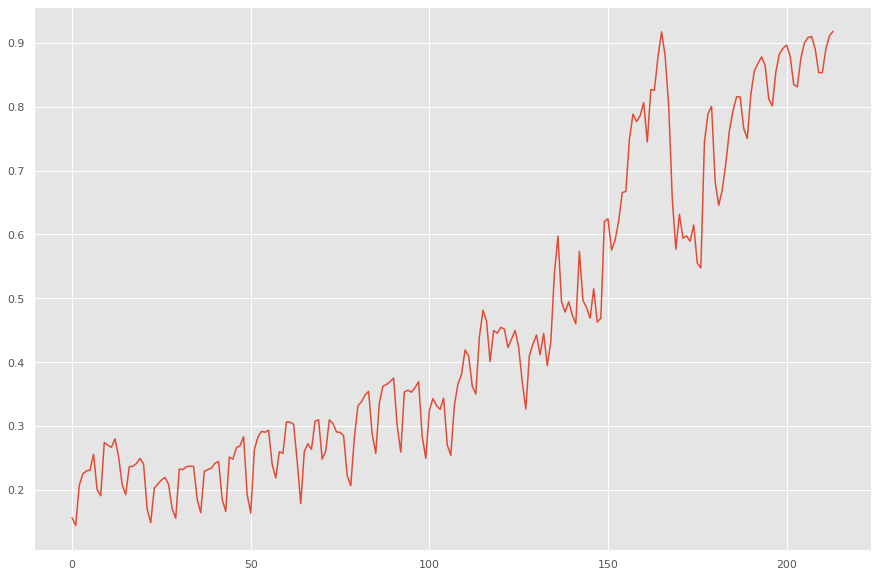

In [ ]:
df3=y.tolist()
df3.extend(lst_output)
plt.figure(figsize=(15,10))
plt.plot(df3[2000:])

